# Pancreatic Cancer Survival Prediction

**Introduction and Background**

Pancreatic cancer is one of the most lethal malignancies worldwide, with a five-year survival rate of less than 10% due to its late diagnosis and aggressive progression. Accurate prediction of patient survival at the time of diagnosis remains a critical challenge in oncology, limiting clinicians’ ability to personalize treatment and allocate resources effectively. With the increasing availability of clinical and genomic data, there is a growing opportunity to leverage machine learning to estimate patient outcomes and support evidence-based decision-making. 


**Problem Statement**

Pancreatic cancer is often diagnosed late and is difficult to treat, making it one of the deadliest cancers. Doctors lack accurate tools to predict how long a patient might survive, which limits personalized care. Although there is a lot of clinical and genomic data available, survival is still mainly predicted using general staging systems. This project aims to build a machine learning model that can better predict survival in pancreatic cancer patients, helping doctors make more informed decisions.

By identifying high-risk individuals early, this tool can support treatment planning, improve patient counseling, and guide the selection of candidates for advanced therapies or clinical trials.

**Project Objectives**

1.	Filter and isolate pancreatic cancer patient data from a larger clinical-genomic dataset to create a focused, high-quality subset for analysis.
2.	Preprocess and engineer features from clinical, pathological, and genomic variables such as tumor mutational burden (TMB), tumor purity, disease stage, and demographic data.
3.	Build a predictive machine learning model to estimate the overall survival status (alive vs. deceased) of pancreatic cancer patients at the time of sample collection or diagnosis.
4.	Evaluate model performance using classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure clinical relevance and reliability.
5.	Interpret model outputs to identify the most influential features contributing to survival predictions, thereby providing insights into potential prognostic biomarkers.
6.	Demonstrate potential clinical utility by outlining how the model could support risk stratification, personalized treatment planning, and early patient counseling in real-world oncology settings.


## 1.	Data Understanding

In [2913]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_recall_curve, roc_curve, f1_score, recall_score, precision_score
from sklearn.impute import SimpleImputer
import joblib


MSK-CHORD (MSK, Nature 2024)
The dataset was sourced from the MSK CHORD 2024 clinical-genomic database, which includes over 25,000 cancer cases. A subset of 3,109 records corresponding to patients with pancreatic cancer was extracted based on the Cancer Type column.
Targeted sequencing of 25040 tumors from 24950 patients and their matched normals via MSK-IMPACT, along with clinical annotations, some of which are derived from natural language processing (denoted NLP). This data is available under the Creative Commons BY-NC-ND 4.0 license. 

Data Url: https://www.cbioportal.org/study/summary?id=msk_chord_2024

In [2914]:
# Imported the dataset
df = pd.read_csv('msk_chord_2024_clinical_data.csv')

# The first 5 rows
df.head()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
0,msk_chord_2024,P-0000012,P-0000012-T02-IM3,No,No,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NaN,No,...,No,Tumor,2,344,Primary,Former/Current Smoker,Matched,Stage 1-3,1.109155,NaN
1,msk_chord_2024,P-0000012,P-0000012-T03-IM3,No,No,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,3B,Distant,No,...,No,Tumor,2,428,Metastasis,Former/Current Smoker,Matched,Stage 1-3,32.165504,NaN
2,msk_chord_2024,P-0000015,P-0000015-T01-IM3,No,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,1,Localized,Yes,...,No,Tumor,1,281,Metastasis,Unknown,Matched,Stage 1-3,7.764087,40.0
3,msk_chord_2024,P-0000036,P-0000036-T01-IM3,No,Yes,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,4,Distant,No,...,No,Tumor,1,380,Primary,Never,Unmatched,Stage 4,7.764087,30.0
4,msk_chord_2024,P-0000041,P-0000041-T01-IM3,No,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,2A,Localized,Yes,...,No,Tumor,1,401,Primary,Unknown,Matched,Stage 1-3,11.091553,30.0


In [2915]:
#Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Study ID                                25040 non-null  object 
 1   Patient ID                              25040 non-null  object 
 2   Sample ID                               25040 non-null  object 
 3   Tumor Site: Adrenal Glands (NLP)        25040 non-null  object 
 4   Tumor Site: Bone (NLP)                  25040 non-null  object 
 5   Cancer Type                             25040 non-null  object 
 6   Cancer Type Detailed                    25040 non-null  object 
 7   Clinical Group                          20376 non-null  object 
 8   Clinical Summary                        24552 non-null  object 
 9   Tumor Site: CNS/Brain (NLP)             25040 non-null  object 
 10  Current Age                             25037 non-null  fl

In [2916]:
# columns vrs Rows
df.shape

(25040, 53)

This shows the dataset has mostly float and object data. They are 25040 rows and 52 columns. The rows and columns will need to be selected and filtered to reduce the dataset and focus on Pancreatic cancer.

In [2917]:
#Overview of all Numeric columns
df.describe()

,Current Age,Fraction Genome Altered,"Gleason Score, 1st Reported (NLP)","Gleason Score, Highest Reported (NLP)",Gleason Score Reported on Sample (NLP),MSI Score,Mutation Count,Number of Tumor Registry Entries,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity
count,25037.000000,24870.000000,3272.000000,3272.000000,2110.000000,24487.000000,23862.000000,25040.000000,25040.000000,25040.000000,25040.000000,25040.000000,24454.000000
mean,65.476655,0.180309,7.845355,7.981663,8.012322,1.438650,8.725756,1.315735,32.128503,1.007188,609.113099,7.258216,36.414452
std,12.683747,0.185514,1.022186,0.976473,0.942561,5.004455,19.416691,0.687179,25.712181,0.084481,213.755797,16.375452,19.201781
min,10.000000,0.000000,6.000000,6.000000,6.000000,-1.000000,1.000000,0.000000,0.032877,1.000000,23.000000,0.000000,0.000000
25%,57.000000,0.021100,7.000000,7.000000,7.000000,0.020000,3.000000,1.000000,11.145193,1.000000,470.000000,2.461042,20.000000
50%,67.000000,0.125800,8.000000,8.000000,8.000000,0.230000,5.000000,1.000000,24.657507,1.000000,598.000000,4.101736,30.000000
75%,75.000000,0.283900,9.000000,9.000000,9.000000,0.900000,8.000000,1.000000,49.183508,1.000000,737.000000,6.917585,50.000000
max,89.000000,1.000000,10.000000,10.000000,10.000000,53.530000,696.000000,10.000000,118.454665,2.000000,2610.000000,570.961677,95.000000


Understanding the all columns in the dataset:

- The Current Age: Patient age ranges from 10 to 89, with an average of 65.5 years.

-  Fraction Genome Altered: Represents how much of the genome is altered, ranging from 0 to 1.

-  Gleason Scores  Indicates prostate cancer severity generally ranges from 6 to 10.

-  MSI Score: Microsatellite Instability score.

- Mutation Count: Mutation events, ranging widely from 1 to 696.

- Number of Tumor Registry Entries: Most patients have 1, with a max of 10.

- Overall Survival : Ranges from near 0 to over 118 months.

- Number of Samples Per Patient: Usually 1, some with 2.

- Sample Coverage: Mean of 609, max up to 2610.

- (TMB) Tumor Mutational Burden mean of 7.26

- Tumor Purity: Ranges from 0 to 95%, with a mean of 36.4%.

## 2. Data Cleaning and preprocessing

We are focusing specifically on pancreatic cancer by filtering the dataset to include only patients diagnosed with this cancer type.

In [2918]:
# Cancer types found in the dataset.
print(df['Cancer Type'].unique())

['Breast Cancer' 'Non-Small Cell Lung Cancer' 'Colorectal Cancer'
 'Prostate Cancer' 'Pancreatic Cancer']


In [2919]:
# Filter for Pancreatic cancer 

df_filtered = df[df['Cancer Type'] == 'Pancreatic Cancer'].copy()

#Confirm the filter
df_filtered.reset_index(drop=True, inplace=True)
print(df_filtered['Cancer Type'].unique())

['Pancreatic Cancer']


In [2920]:
# New columns and rows
df_filtered.shape

(3109, 53)

The data set is large with 53 columns, we decided to drop certain columns to focus on what will be used for prediction and EDA. The target variable being the 'Overall Survival Status' and the rest are features.

In [2921]:
# Dropping columns and focusing on the selected columns
df_filtered = df_filtered[[
    'Overall Survival Status','Overall Survival (Months)','Current Age','Sex','Race','Stage (Highest Recorded)',
    'Ethnicity','Smoking History (NLP)','Sample Type','Metastatic Site','TMB (nonsynonymous)','Tumor Purity','Fraction Genome Altered',
    'MSI Score','Mutation Count','Sample coverage'
]]

# The new dataset cleaned and filtered dataset
df_filtered.head()


,Overall Survival Status,Overall Survival (Months),Current Age,Sex,Race,Stage (Highest Recorded),Ethnicity,Smoking History (NLP),Sample Type,Metastatic Site,TMB (nonsynonymous),Tumor Purity,Fraction Genome Altered,MSI Score,Mutation Count,Sample coverage
0,1:DECEASED,8.810949,56.0,Female,White,Stage 1-3,Non-Spanish; Non-Hispanic,Unknown,Primary,NaN,4.436621,40.0,0.2681,0.00,4.0,639
1,1:DECEASED,33.731470,47.0,Male,White,Stage 4,Non-Spanish; Non-Hispanic,Former/Current Smoker,Primary,NaN,7.764087,90.0,0.3610,1.29,7.0,883
2,1:DECEASED,25.052027,69.0,Male,White,Stage 4,Non-Spanish; Non-Hispanic,Never,Metastasis,Lung,0.000000,20.0,0.0005,0.08,NaN,452
3,1:DECEASED,3.057531,64.0,Male,White,Stage 1-3,Non-Spanish; Non-Hispanic,Unknown,Primary,NaN,5.545777,80.0,0.4135,0.47,5.0,399
4,0:LIVING,110.531386,65.0,Female,Black Or African American,Stage 1-3,Non-Spanish; Non-Hispanic,Former/Current Smoker,Primary,NaN,6.562778,60.0,0.2843,0.54,8.0,518


In [2922]:
df_filtered.shape

(3109, 16)

In [2923]:
# Finding Nulls and Missing entries
df_filtered.isnull().sum()

Overall Survival Status         0
Overall Survival (Months)       0
Current Age                     0
Sex                             0
Race                            0
Stage (Highest Recorded)        0
Ethnicity                       0
Smoking History (NLP)           0
Sample Type                     0
Metastatic Site              1990
TMB (nonsynonymous)             0
Tumor Purity                   27
Fraction Genome Altered        11
MSI Score                      61
Mutation Count                154
Sample coverage                 0
dtype: int64

The column with missing entries is the Tumor Purity, current Age , MSI Score, fraction genome altered, and mutation count. The Age null rows will be dropped and the Tumor with N/A as not to distort the dataset, the numeric columns such as MSI Score and Mutation count will be filled with the average.

In [2924]:
# Dropped rows
df_filtered = df_filtered.dropna(subset=['Current Age'])
df_filtered.isnull().sum()

Overall Survival Status         0
Overall Survival (Months)       0
Current Age                     0
Sex                             0
Race                            0
Stage (Highest Recorded)        0
Ethnicity                       0
Smoking History (NLP)           0
Sample Type                     0
Metastatic Site              1990
TMB (nonsynonymous)             0
Tumor Purity                   27
Fraction Genome Altered        11
MSI Score                      61
Mutation Count                154
Sample coverage                 0
dtype: int64

In [2925]:
# Filled rows
df_filtered['Tumor Purity'] = df_filtered['Tumor Purity'].fillna('N/A')
df_filtered['Metastatic Site'] = df_filtered['Metastatic Site'].fillna('N/A')
df_filtered['Fraction Genome Altered'] = df_filtered['Fraction Genome Altered'].fillna(df_filtered['Fraction Genome Altered'].mean())
df_filtered['MSI Score'] = df_filtered['MSI Score'].fillna(df_filtered['MSI Score'].mean())
df_filtered['Mutation Count'] = df_filtered['Mutation Count'].fillna(df_filtered['Mutation Count'].mean())
df_filtered.isnull().sum()

Overall Survival Status      0
Overall Survival (Months)    0
Current Age                  0
Sex                          0
Race                         0
Stage (Highest Recorded)     0
Ethnicity                    0
Smoking History (NLP)        0
Sample Type                  0
Metastatic Site              0
TMB (nonsynonymous)          0
Tumor Purity                 0
Fraction Genome Altered      0
MSI Score                    0
Mutation Count               0
Sample coverage              0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

In this section , we look into key patient characteristics, treatment factors, and clinical variables associated with pancreatic cancer. We will explore feature distributions, and potential relationships between variables and survival outcomes.

### EDA Goals
- Understand feature distributions (e.g., age, stage, mutation count)
- Examine survival status distribution
- Explore relationships between features and survival outcome
- Detect any anomalies, imbalances, or feature engineering opportunities

## 3.1 Data Visualization 

### A. Target Variable Analysis: Survival Status

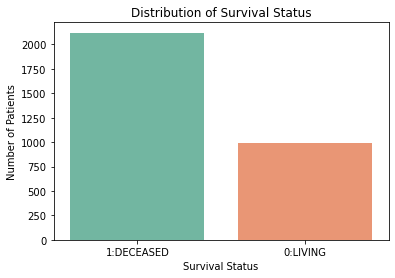

In [2926]:
# Survival status distribution
sns.countplot(x='Overall Survival Status', data=df_filtered, palette='Set2')
plt.title('Distribution of Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Number of Patients')
plt.show()

The bar chart shows the distribution of patients based on their overall survival status.
- From the above bar chart we are able to see that the number of living patients is higher than the number of deceased patients in the dataset.

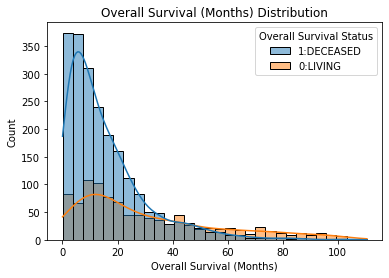

In [2927]:
# Survival in months
sns.histplot(data=df_filtered, x='Overall Survival (Months)', bins=30, kde=True, hue='Overall Survival Status')
plt.title('Overall Survival (Months) Distribution')
plt.show()

The histogram shows the distribution of overall survival time (in months) for patients based on their survival status.

- Most of the patients who passed away (deceased) did so within the first few months after diagnosis or treatment. This is shown by the tall orange bars on the left side of the chart (representing fewer months of survival).The "peak" refers to the highest concentration of deceased patients occurring in the early survival months between 0–10 months.As time goes on (moving right on the x-axis), fewer deceased patients are observed, indicating that early mortality is more common in the dataset.

- Among the patients who are still alive, their survival times are more spread out over a longer period. The blue bars extend further to the right on the x-axis, showing that many living patients have survived well beyond 40 months. Unlike the deceased group (which peaks early), the living group does not sharply decline and continues across a wider range, suggesting long-term survival is common among them

### B. Demographic Analysis 

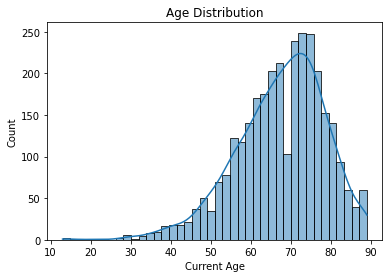

In [2928]:
# Age distribution
sns.histplot(data=df_filtered, x='Current Age', kde=True)
plt.title('Age Distribution')
plt.show()

The histogram shows the distribution of patients’ current ages in the dataset.

- A large number of patients in the dataset are between the ages of 60 and 80. The peak around age 70 shows that this is the most common age among the patients than any other age.

- There are not many patients in the dataset who are younger than 40 or older than 85. Most of the data is focused on patients who are in their middle-aged to elderly years, especially between 60 and 80 years because the health condition being studied is more common in that age group.

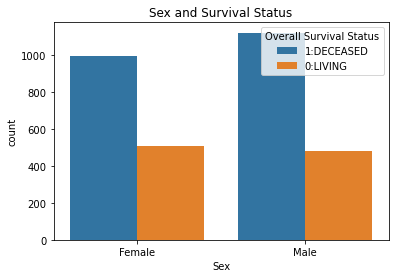

In [2929]:
# Sex vs survival
sns.countplot(x='Sex', hue='Overall Survival Status', data=df_filtered)
plt.title('Sex and Survival Status')
plt.show()

The bar chart displays the distribution of survival status across sexes

- The data shown by the chart, many more women are alive than have passed away. This suggests that females may have a higher survival rate compared to males based on the conditions or time period represented in the dataset. It reflects a noticeable difference in the survival outcome for women.

- As many males have died as have survived, but slightly more are still living. This suggests that male survival rates are lower compared to females in the dataset.

- A higher proportion of females are alive than males. This suggests that females are more likely to survive than males under the same conditions represented in the dataset. It indicates a gender-based difference in survival outcomes, with females faring better.

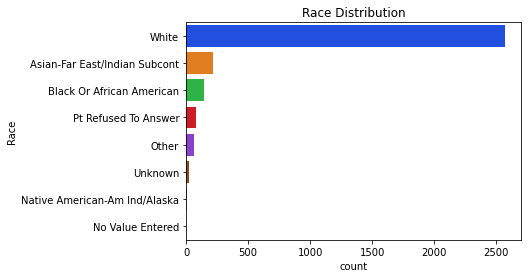

In [2930]:
# Race and ethnicity
sns.countplot(y='Race', data=df_filtered, order=df_filtered['Race'].value_counts().index, palette='bright')
plt.title('Race Distribution')
plt.show()

- The bar chart shows that the racial diversity of the patients including that the majority of individuals in the dataset identify as White, with a count close to 2500.

- Other racial groups such as Asian-Far East/Indian Subcontinent and Black or African American are represented in much smaller numbers of around 250 and 240

- A small portion of the data includes individuals who refused to answer, selected "Other," or had unknown or missing information.

### C. Tumor and Genomic Characteristics

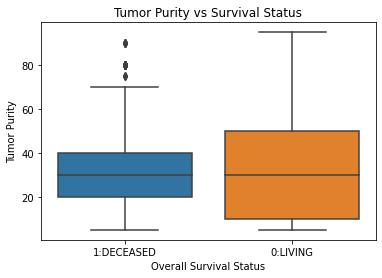

In [2931]:
df_filtered['Tumor Purity'] = pd.to_numeric(df_filtered['Tumor Purity'], errors='coerce')

# Tumor Purity
sns.boxplot(x='Overall Survival Status', y='Tumor Purity', data=df_filtered)
plt.title('Tumor Purity vs Survival Status')
plt.show()

The box plot compares tumor purity levels between living  and deceased  individuals.

- Both groups show similar distributions, with median tumor purity around 30 and a wide range from near 0 to above 90.This suggests that tumor purity does not show a strong difference between those who are living and those who are deceased in the dataset.

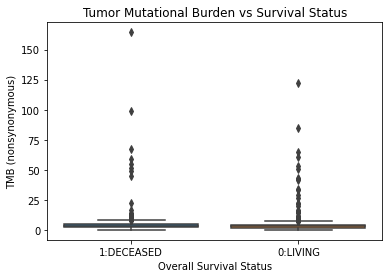

In [2932]:
# Tumor Mutational Burden
sns.boxplot(x='Overall Survival Status', y='TMB (nonsynonymous)', data=df_filtered)
plt.title('Tumor Mutational Burden vs Survival Status')
plt.show()

The box plot displays the distribution of tumor mutational burden (TMB) in living and deceased individuals.

- The typical value of tumor mutational burden (TMB) is about the same for both living and deceased individuals. Most patients have low TMB values, as shown by the tight clustering of data near the bottom of the plot. However, there are some patients with unusually high TMB values, which are shown as dots far above the rest of the data these are called outliers, and they indicate rare but extreme cases.

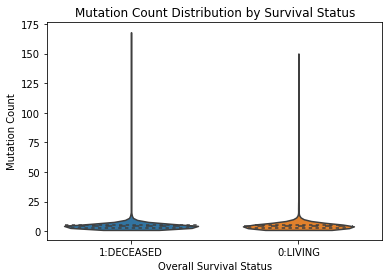

In [2933]:
# Mutation Count
sns.violinplot(x='Overall Survival Status', y='Mutation Count', data=df_filtered, inner='quartile', cut=0)
plt.title('Mutation Count Distribution by Survival Status')
plt.xlabel('Overall Survival Status')
plt.ylabel('Mutation Count')
plt.show()

The violin plot shows the distribution of mutation counts for both living and deceased individuals.

- In both groups, most individuals have low mutation counts, with a few having extremely high values, especially in the living group. The overall shape and spread of the distributions are similar, suggesting that mutation count does not strongly differ between survival outcomes.

### D. Clinical Staging and Smoking History

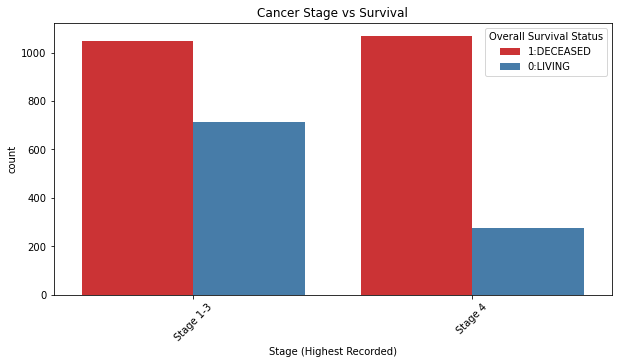

In [2934]:
# Stage distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Stage (Highest Recorded)', hue='Overall Survival Status', data=df_filtered, palette='Set1')
plt.title('Cancer Stage vs Survival')
plt.xticks(rotation=45)
plt.show()

The bar chart shows that most patients with Stage 1–3 cancer are living while fewer have died.
- A larger number of patients diagnosed at these stages are still alive, indicating that early detection and treatment may lead to higher chances of survival. It highlights the potential benefit of catching cancer before it progresses to more advanced stages.

- A higher number of patients diagnosed with advanced (Stage 4) cancer have died compared to those who are still alive. This suggests that Stage 4 cancer is linked to a lower survival rate, likely because it is more severe, harder to treat, or has spread more extensively. It emphasizes the seriousness of late-stage cancer and its impact on patient outcomes.

- This highlights the importance of early detection, as catching cancer before it becomes advanced can significantly improve a patient's chances of living longer. It reflects a strong relationship between cancer stage at diagnosis and survival outcomes.

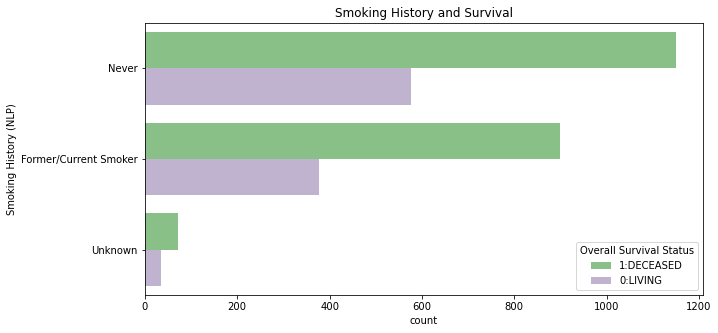

In [2935]:
# Smoking history
plt.figure(figsize=(10, 5))
sns.countplot(y='Smoking History (NLP)', hue='Overall Survival Status', data=df_filtered, order=df_filtered['Smoking History (NLP)'].value_counts().index, palette='Accent')
plt.title('Smoking History and Survival')
plt.show()


- Never Smokers: Individuals who never smoked have the highest survival count, with noticeably more living than deceased. This suggests that never smoking may be associated with better survival outcomes.

- Former/Current Smokers: The number of living and deceased individuals in this group is more balanced, but slightly more are living. However, compared to never smokers, their survival rate appears lower, indicating that a history of smoking may negatively affect survival.

- Unknown Smoking History: This group is the smallest, and most individuals in it are deceased, suggesting either missing or unclear data, or possibly higher risk but the numbers are too small to draw strong conclusions.

The chart implies a potential link between smoking history and survival, where individuals who never smoked tend to have better survival outcomes compared to those who have smoked.

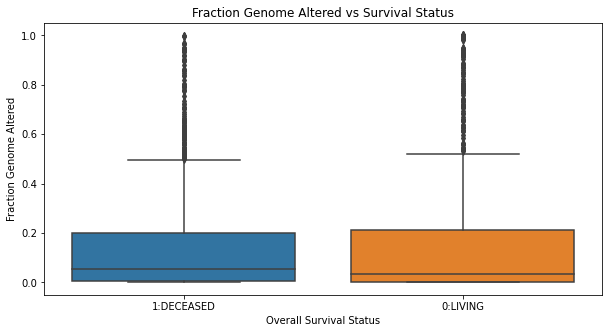

In [2936]:
# Fraction Genome Altered
plt.figure(figsize=(10, 5))
sns.boxplot(x='Overall Survival Status', y='Fraction Genome Altered', data=df_filtered)
plt.title('Fraction Genome Altered vs Survival Status')
plt.show()

### E. Survival by Metastatic Site

Metastatic pancreatic cancer spreads to specific organs, and where it spreads to can significantly affect prognosis. 

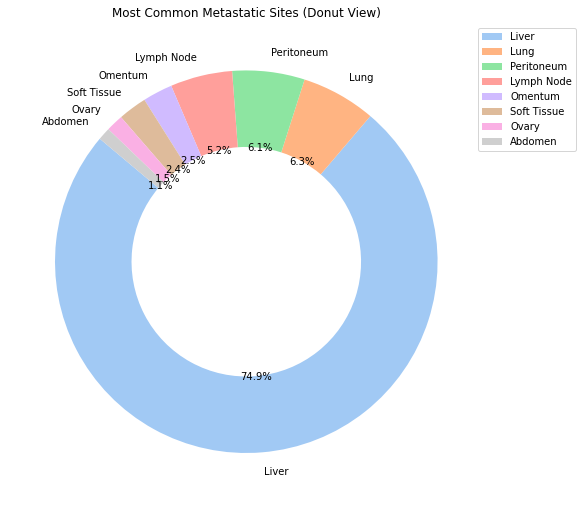

In [2937]:
# filter out N/A
metastatic_df = df_filtered[df_filtered['Metastatic Site'] != 'N/A']

# Count values
site_counts = metastatic_df['Metastatic Site'].value_counts().nlargest(8)
colors = sns.color_palette('pastel')[0:8]

plt.figure(figsize=(8, 8))
plt.pie(site_counts, labels=site_counts.index, colors=colors, wedgeprops={'width': 0.4}, startangle=140, autopct='%1.1f%%')
plt.title('Most Common Metastatic Sites (Donut View)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


The liver is the most common site of metastasis for pancreatic cancer.

## 3.2 Feature Engineering 

###  3.2.1 Correlation Analysis 
Finds the redundant or weakly correlated features in the dataset

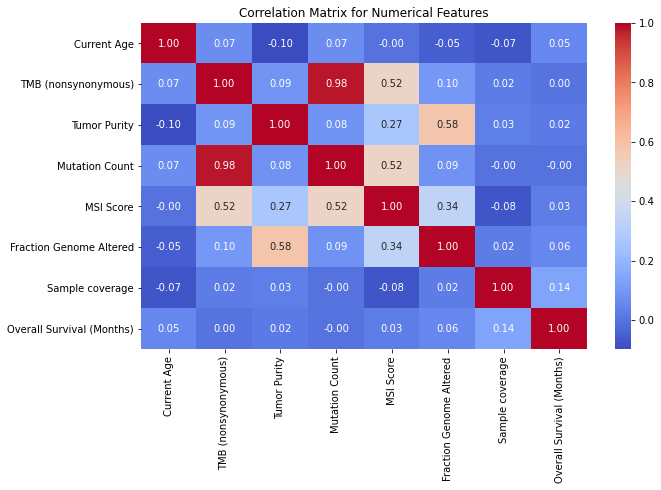

In [2938]:
# Select numerical features
numerical_features = ['Current Age', 'TMB (nonsynonymous)', 'Tumor Purity',
                      'Mutation Count', 'MSI Score', 'Fraction Genome Altered', 
                      'Sample coverage', 'Overall Survival (Months)']

# Compute correlation matrix
corr_matrix = df_filtered[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

- Positive correlations: This means the features move in the same direction and when one increases the other downs by a certain amount.
  - There is a strong positive correlations between TMB(nonsynonymous) and Mutation count at 0.98, they more almost identically.
  - TMB and MSI Score have a strong correlation at 0.52 and Mutation count with MSI score at 0.52
  - Further strong correlations include Tumor purity and Fraction Genome Altered at 0.58
  - There is a moderate correlation between MSI score and Tumor purity at 0.27 abd MSI score and fraction genome altered at 0.34


- Negative correlations: These indicate that as one feature increases, the other tends to decrease by a certain amount, and vice versa.
  - In this dataset, most negative relationships were negligible, meaning they had very weak or no meaningful inverse associations. The highest is -0.1 between tumor purity and current age.
  - This suggests that genomic and clinical features in this dataset tend to co-vary positively, rather than acting as strong inverse predictors.

### 3.2.2 Chi-Squared Test 
Assesses the association between categorical variables and survival status.

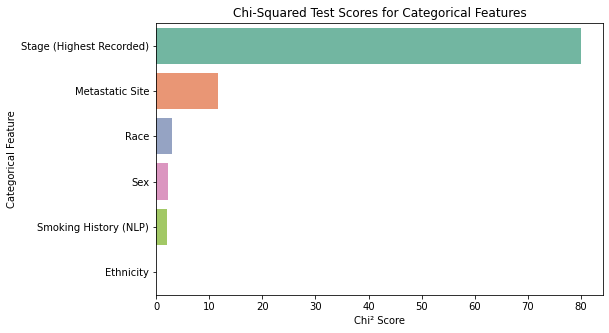

In [2939]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Encode categorical variables numerically
cat_features = ['Sex', 'Ethnicity', 'Race', 'Smoking History (NLP)', 'Stage (Highest Recorded)', 'Metastatic Site']
df_cat = df_filtered[cat_features].apply(LabelEncoder().fit_transform)

# Target must be numeric
y = LabelEncoder().fit_transform(df_filtered['Overall Survival Status'])

# Apply Chi2 test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(df_cat, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=cat_features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index, palette='Set2')
plt.title("Chi-Squared Test Scores for Categorical Features")
plt.xlabel("Chi² Score")
plt.ylabel("Categorical Feature")
plt.show()

### 3.2.3 Feature Importance 

Feature importance shows how valuable each feature is in predicting the target outcome. It tells you which variables the model relied on most for decision-making.

#### 1. Logistic Regression – Coefficients as Feature Importance

In [2940]:
# Replacing missing values with the mean
numeric_cols = ['TMB (nonsynonymous)', 'Tumor Purity', 'Mutation Count', 'MSI Score', 'Fraction Genome Altered']

 # Ensure numeric and fill NaNs with mean
for col in numeric_cols:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce') 
    df_filtered[col] = df_filtered[col].fillna(df_filtered[col].mean()) 

In [2941]:
X = df_filtered[['Current Age', 'TMB (nonsynonymous)', 'Tumor Purity',
                 'Mutation Count', 'MSI Score', 'Fraction Genome Altered',
                 'Sample coverage']]
y = LabelEncoder().fit_transform(df_filtered['Overall Survival Status'])

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [2942]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

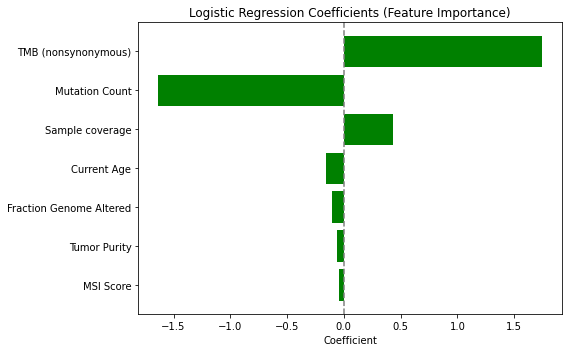

In [2943]:
# Get coefficients
coef = logreg.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()

TMB (nonsynonymous) has the highest positive influence on the model's prediction followed by sample coverage and Fraction genome altered.
Mutation count has a strong negative influence it decreases the probability of a positive outcome.


### 2. Random Forest – Feature Importance

In [2944]:
X_train_raw, X_test_raw, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_raw, y_train)

# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=features).sort_values()

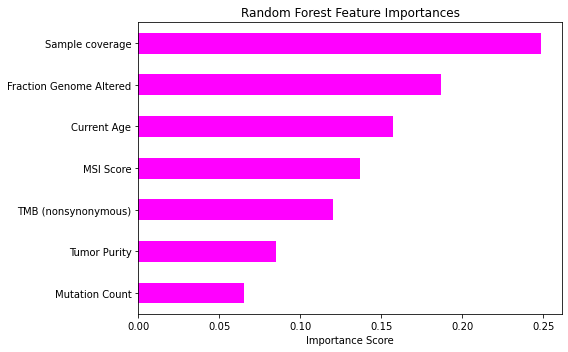

In [2945]:
# Plot
plt.figure(figsize=(8, 5))
rf_importances.plot(kind='barh', color='magenta')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

The top features that contribute to the model is Sample coverage with a value around 0.24 and Fraction Genome around 0.18

###  3.2.4 Encoding Categorical Variables 

In [2946]:
# Create copies to avoid modifying original DataFrame directly
df_encoded = df_filtered.copy()

# Label encode binary feature 'Sex'
le_sex = LabelEncoder()
df_encoded['Sex'] = le_sex.fit_transform(df_encoded['Sex'])

In [2947]:
# Ordinal encoding for Stage
stage_order = {'Stage I': 0, 'Stage II': 1, 'Stage III': 2, 'Stage IV': 3}
df_encoded['Stage (Highest Recorded)'] = df_encoded['Stage (Highest Recorded)'].map(stage_order)

In [2948]:
# One-hot encode Ethnicity, Race, Smoking History, Sample Type, Metastatic Site
df_encoded = pd.get_dummies(df_encoded, 
                            columns=['Ethnicity', 'Race', 'Smoking History (NLP)', 
                                     'Sample Type', 'Metastatic Site'], 
                            drop_first=True)

In [2949]:
df_encoded.head()


,Overall Survival Status,Overall Survival (Months),Current Age,Sex,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity,Fraction Genome Altered,MSI Score,Mutation Count,...,Metastatic Site_Retroperitoneum,Metastatic Site_Skin,Metastatic Site_Small Bowel,Metastatic Site_Small Intestine,Metastatic Site_Soft Tissue,Metastatic Site_Soft tissue,Metastatic Site_Stomach,Metastatic Site_Uterus,Metastatic Site_liver,Metastatic Site_right upper quadrant peritoneum
0,1:DECEASED,8.810949,56.0,0,NaN,4.436621,40.0,0.2681,0.00,4.000000,...,0,0,0,0,0,0,0,0,0,0
1,1:DECEASED,33.731470,47.0,1,NaN,7.764087,90.0,0.3610,1.29,7.000000,...,0,0,0,0,0,0,0,0,0,0
2,1:DECEASED,25.052027,69.0,1,NaN,0.000000,20.0,0.0005,0.08,4.632487,...,0,0,0,0,0,0,0,0,0,0
3,1:DECEASED,3.057531,64.0,1,NaN,5.545777,80.0,0.4135,0.47,5.000000,...,0,0,0,0,0,0,0,0,0,0
4,0:LIVING,110.531386,65.0,0,NaN,6.562778,60.0,0.2843,0.54,8.000000,...,0,0,0,0,0,0,0,0,0,0


In [2950]:
print("Encoded columns:", df_encoded.columns.tolist())

Encoded columns: ['Overall Survival Status', 'Overall Survival (Months)', 'Current Age', 'Sex', 'Stage (Highest Recorded)', 'TMB (nonsynonymous)', 'Tumor Purity', 'Fraction Genome Altered', 'MSI Score', 'Mutation Count', 'Sample coverage', 'Ethnicity_Dominican Republic', 'Ethnicity_Mexican (includes Chicano)', 'Ethnicity_Non-Spanish; Non-Hispanic', 'Ethnicity_Other Spanish/Hispanic(incl European; excl Dom Rep', 'Ethnicity_Puerto Rican', 'Ethnicity_South/Central America (except Brazil)', 'Ethnicity_Spanish  NOS; Hispanic NOS, Latino NOS', 'Ethnicity_Unknown whether Spanish or not', 'Race_Black Or African American', 'Race_Native American-Am Ind/Alaska', 'Race_No Value Entered', 'Race_Other', 'Race_Pt Refused To Answer', 'Race_Unknown', 'Race_White', 'Smoking History (NLP)_Never', 'Smoking History (NLP)_Unknown', 'Sample Type_Metastasis', 'Sample Type_Primary', 'Sample Type_Unknown', 'Metastatic Site_Abdominal Wall', 'Metastatic Site_Abdominal wall', 'Metastatic Site_Adnexa or Endomterium

## 4. Data Modelling

### Data Modeling Goals

The primary aim is to develop a machine learning model to predict the overall survival status (alive vs. deceased) of pancreatic cancer patients.

- Accurate Prediction: Build a model that accurately predicts survival status (binary classification: 0:LIVING vs. 1:DECEASED) using clinical, pathological, and genomic features.
- Model Robustness: Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure clinical reliability, prioritizing recall to identify deceased patients.

### 4.1 Select Relevant Features

Selecting clinically and genomically relevant features (e.g., Current Age, TMB (nonsynonymous), Stage) ensures the model focuses on variables likely to influence survival, improving predictive power and interpretability while reducing dimensionality.

In [2951]:
# Define features and target
features = ['Current Age', 'Sex', 'Tumor Purity', 'Sample coverage',
            'TMB (nonsynonymous)', 'MSI Score', 'Fraction Genome Altered', 'Mutation Count']

X = df_encoded[features]
y = df_encoded['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})
print("Features selected:", features)
print("Target distribution:\n", y.value_counts())

Features selected: ['Current Age', 'Sex', 'Tumor Purity', 'Sample coverage', 'TMB (nonsynonymous)', 'MSI Score', 'Fraction Genome Altered', 'Mutation Count']
Target distribution:
 1    2120
0     989
Name: Overall Survival Status, dtype: int64


### 4.2 Scale Numerical Features

Scaling numerical features ensures they contribute equally to models sensitive to feature scales (e.g., Logistic Regression), improving performance.


In [2952]:
# Numerical columns that are be to scaled
numerical_features = ['Current Age', 'Tumor Purity', 'Sample coverage',
                      'TMB (nonsynonymous)', 'MSI Score',
                      'Fraction Genome Altered', 'Mutation Count']
X = df_encoded[features].copy()

In [2953]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

In [2954]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

### 4.3  Splitting the dataset

Splitting into training and testing sets allows evaluation of model generalization.


In [2955]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (2487, 8), Testing set size: (622, 8)


### 4.4 Model Development

We will train and compare three models: Logistic Regression, Random Forest Classifier, and XGBoost Classifier

These models are chosen for their interpretability (Logistic Regression) and ability to handle complex relationships (Random Forest, XGBoost).

In [2956]:
print(X[numerical_features].dtypes)

Current Age                float64
Tumor Purity               float64
Sample coverage            float64
TMB (nonsynonymous)        float64
MSI Score                  float64
Fraction Genome Altered    float64
Mutation Count             float64
dtype: object


In [2957]:
# Convert columns to numeric, forcing errors to NaN
X[numerical_features] = X[numerical_features].apply(pd.to_numeric, errors='coerce')


In [2958]:
# Fill remaining NaN values with 0 or another value
X.fillna(0, inplace=True)  # or use X.fillna(X.mean(), inplace=True)

In [2959]:
# Check for NaN values in training data
print("NaN values in X_train:")
print(X_train.isnull().sum())

print("NaN values in y_train:")
print(y_train.isnull().sum())

NaN values in X_train:
Current Age                0
Sex                        0
Tumor Purity               0
Sample coverage            0
TMB (nonsynonymous)        0
MSI Score                  0
Fraction Genome Altered    0
Mutation Count             0
dtype: int64
NaN values in y_train:
0


### 4.4.1 Logistic Regression the baseline model

A simple, interpretable model suitable for binary classification.

In [2960]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[:, 1]

# Print model performance
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, lr_prob):.4f}")

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.50      0.15      0.23       198
           1       0.70      0.93      0.80       424

    accuracy                           0.68       622
   macro avg       0.60      0.54      0.52       622
weighted avg       0.64      0.68      0.62       622

ROC-AUC: 0.6558


### 4.2.1 Random Forest Classifier

Random Forest is robust for handling non-linear relationships and feature interactions in clinical-genomic data. It also provides feature importance scores for interpretability.

A Random Forest model is trained on the preprocessed data (X_train, y_train). Performance is evaluated using classification_report (accuracy, precision, recall, F1-score) and ROC-AUC. The ROC curve is plotted for visualization.

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.54      0.28      0.37       198
           1       0.73      0.89      0.80       424

    accuracy                           0.69       622
   macro avg       0.63      0.58      0.58       622
weighted avg       0.67      0.69      0.66       622

ROC-AUC: 0.6699


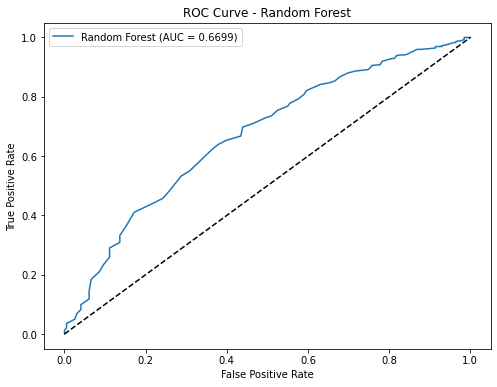

In [2961]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]

# Print model performance
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf_prob):.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

### 4.2.2 XGBoost Classifier

XGBoost excels with structured, potentially sparse, and imbalanced datasets, often outperforming simpler models in predictive accuracy.

An XGBoost model is trained with eval_metric='logloss' to handle binary classification. Performance metrics and ROC curve are generated similarly to Random Forest.

c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.48      0.35      0.40       198
           1       0.73      0.82      0.77       424

    accuracy                           0.67       622
   macro avg       0.60      0.58      0.59       622
weighted avg       0.65      0.67      0.65       622

ROC-AUC: 0.6597


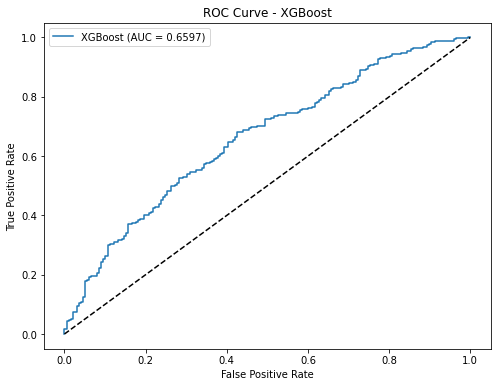

In [2962]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

# Print model performance
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_prob):.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

### 4.2.3 Cross-Validation

Cross-validation provides robust performance estimates by evaluating models on multiple data splits, reducing overfitting risks and ensuring generalizability.

5-fold cross-validation is performed for all three models (Logistic Regression, Random Forest, XGBoost) using cross_val_score with ROC-AUC as the scoring metric. Mean and standard deviation of ROC-AUC scores are reported.

In [2963]:
# Perform 5-fold cross-validation for each model
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_processed, y, cv=5, scoring='roc_auc')
    print(f"{name} 5-Fold CV ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Logistic Regression 5-Fold CV ROC-AUC: 0.6533 ± 0.0177
Random Forest 5-Fold CV ROC-AUC: 0.6265 ± 0.0336


c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecate

XGBoost 5-Fold CV ROC-AUC: 0.6473 ± 0.0391


c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 4.2.4 Hyperparameter Tuning

Tuning optimizes model performance (ROC-AUC) by finding the best parameters, balancing complexity and accuracy for clinical reliability.

GridSearchCV is used to tune hyperparameters for Random Forest (e.g., n_estimators, max_depth) and XGBoost (e.g., n_estimators, learning_rate). The best parameters and performance of tuned models are printed.

In [2964]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best Random Forest model
print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
rf_best_pred = rf_best.predict(X_test)
rf_best_prob = rf_best.predict_proba(X_test)[:, 1]
print("Tuned Random Forest Performance:")
print(classification_report(y_test, rf_best_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf_best_prob):.4f}")

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Best XGBoost model
print("Best XGBoost Parameters:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_
xgb_best_pred = xgb_best.predict(X_test)
xgb_best_prob = xgb_best.predict_proba(X_test)[:, 1]
print("Tuned XGBoost Performance:")
print(classification_report(y_test, xgb_best_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_best_prob):.4f}")

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.54      0.18      0.27       198
           1       0.71      0.93      0.80       424

    accuracy                           0.69       622
   macro avg       0.62      0.55      0.53       622
weighted avg       0.65      0.69      0.63       622

ROC-AUC: 0.6756
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Tuned XGBoost Performance:
              precision    recall  f1-score   support

           0       0.56      0.23      0.33       198
           1       0.72      0.92      0.80       424

    accuracy                           0.70       622
   macro avg       0.64      0.57      0.57       622
weighted avg       0.67      0.70      0.65       622

ROC-AUC: 0.6891


c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 4.2.5 Feature Importance Analysis

Identifying key features (e.g., Stage, TMB) helps uncover prognostic biomarkers, supporting clinical research and practice.

Feature importances from the tuned Random Forest and XGBoost models are extracted and visualized using bar plots, highlighting the most influential predictors.

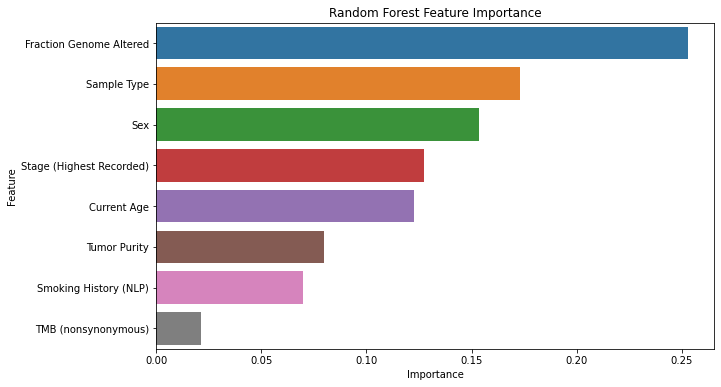

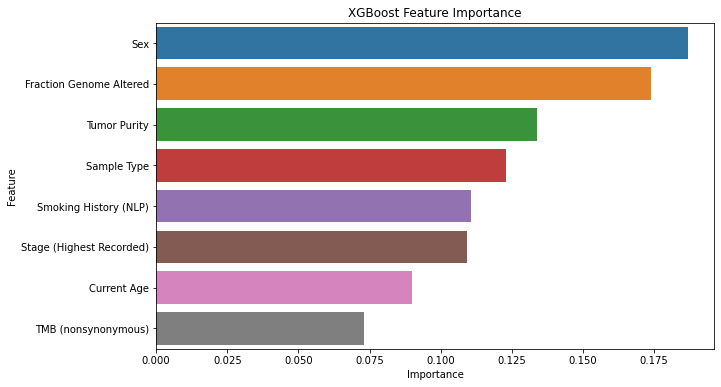

In [2965]:
# Feature importance for Random Forest
rf_importances = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importances)
plt.title('Random Forest Feature Importance')
plt.show()

# Feature importance for XGBoost
xgb_importances = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': xgb_best.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importances)
plt.title('XGBoost Feature Importance')
plt.show()

### 4.2.6 Clinical Utility Demonstration and Threshold Tuning
Risk stratification demonstrates how the model can identify high-risk patients for targeted therapies, aligning with clinical decision-making goals.

The best model (e.g., XGBoost) predicts risk scores (probability of 'Deceased'). Patients are classified as high or low risk based on a threshold (0.5). A sample of results is displayed, and a histogram visualizes the risk score distribution. A summary explains how the model supports personalized treatment planning.

Threshold tuning is performed to optimize the classification threshold for predicting 'Deceased' patients, prioritizing sensitivity while balancing precision. The best model (XGBoost) predicts risk scores, and patients are classified as high or low risk based on the optimal threshold. A sample of results is displayed, and a histogram visualizes the risk score distribution.

c:\Users\MichelleChekwooti\anaconda3\envs\learn-env\lib\site-packages\xgboost\data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Optimal Threshold (maximizing F1-score): 0.2822
F1-Score at Optimal Threshold: 0.8191
Precision at Optimal Threshold: 0.6970
Recall at Optimal Threshold: 0.9929


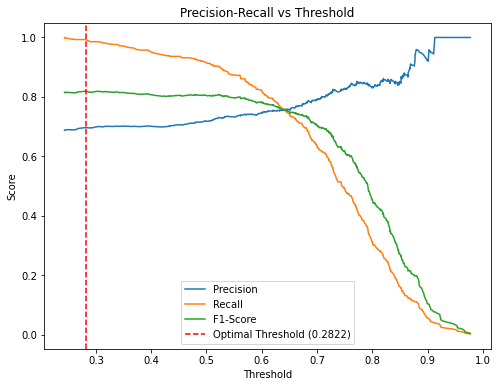

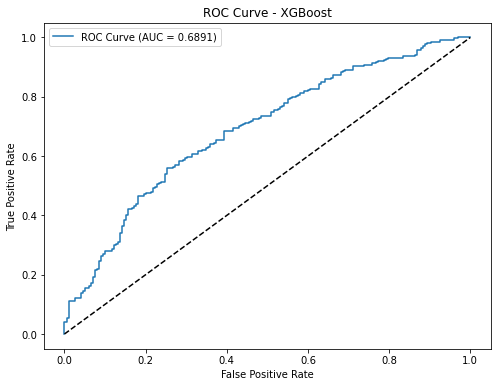

KeyError: '[975, 2729, 533, 140, 855, 706, 2979, 2822, 1110, 27, 2094, 454, 2947, 1819, 380, 2344, 478, 103, 974, 207, 164, 2950, 11, 1004, 922, 571, 1854, 1878, 222, 1531, 1137, 2444, 1772, 2718, 368, 2919, 2969, 619, 2965, 3081, 1287, 1637, 1509, 2654, 2066, 160, 1297, 1713, 1981, 841, 2307, 2238, 2081, 2645, 716, 616, 2958, 1259, 1101, 988, 2857, 861, 2090, 8, 2669, 1313, 913, 660, 97, 156, 1143, 1477, 537, 1060, 2638, 1254, 1146, 2154, 1124, 2791, 1796, 709, 812, 1746, 1156, 2502, 2139, 2668, 883, 157, 2720, 183, 2904, 524, 2167, 1140, 2497, 1836, 672, 1655, 2802, 1230, 1128, 2834, 238, 1399, 2809, 2635, 1081, 1538, 258, 850, 1573, 2583, 1325, 1853, 2929, 181, 418, 1902, 143, 1200, 2361, 1812, 870, 73, 1379, 1905, 2207, 335, 1880, 2149, 945, 1635, 1018, 2414, 1236, 3051, 2602, 1062, 679, 1424, 506, 203, 1337, 3065, 508, 1203, 42, 2439, 60, 2112, 2383, 77, 543, 1916, 2576, 1657, 1067, 2466, 320, 2666, 2122, 1466, 1052, 1698, 3088, 2572, 2516, 2724, 962, 2499, 2671, 823, 2189, 2212, 887, 2821, 2000, 84, 2795, 2289, 1155, 2225, 2850, 2168, 2808, 2336, 2952, 248, 1167, 3059, 404, 1061, 1382, 1121, 517, 2606, 2102, 2300, 1396, 1323, 1286, 2215, 278, 831, 759, 2369, 640, 1607, 19, 994, 1198, 1480, 173, 241, 2915, 1183, 781, 2192, 2394, 848, 35, 217, 924, 1947, 1931, 1231, 765, 94, 1519, 1161, 892, 1243, 288, 318, 591, 1803, 2798, 2706, 2426, 588, 532, 1917, 2073, 2185, 906, 1142, 180, 741, 2640, 464, 1520, 1575, 439, 2580, 16, 2380, 2814, 3096, 399, 2446, 2551, 1618, 733, 2448, 2193, 2567, 1556, 1364, 420, 977, 25, 2670, 1100, 2287, 1181, 1369, 2146, 1450, 2867, 1151, 3025, 1602, 12, 1196, 1612, 2816, 2145, 2917, 2840, 1139, 1097, 1024, 1129, 1410, 799, 1720, 910, 1664, 723, 829, 1001, 546, 2030, 573, 2109, 2810, 2942, 2386, 2843, 2274, 348, 1484, 987, 1458, 1474, 644, 2186, 411, 797, 1282, 2875, 2129, 1222, 1211, 968, 778, 719, 414, 806, 1456, 628, 2398, 1856, 1449, 1326, 243, 397, 3030, 2180, 54, 31, 890, 801, 2505, 449, 1051, 1403, 1609, 1409, 1535, 598, 1289, 262, 1455, 2616, 944, 2523, 1201, 2883, 1038, 3101, 1870, 1411, 3063, 2856, 1778, 171, 2408, 2752, 1235, 2879, 296, 1879, 466, 1030, 612, 2892, 1605, 2367, 2964, 1572, 1658, 2001, 1283, 2647, 754, 185, 565, 1214, 1858, 1065, 2407, 2663, 1208, 2872, 327, 265, 772, 1967, 2569, 2382, 1268, 118, 2710, 1321, 704, 1617, 600, 1759, 2801, 1716, 347, 904, 1239, 1843, 1745, 1428, 432, 2912, 1701, 2452, 67, 1247, 1615, 1580, 1481, 1542, 2604, 2177, 1454, 2206, 1876, 2744, 566, 2799, 55, 2194, 2329, 1120, 69, 388, 2260, 570, 117, 2762, 789, 2377, 2760, 2390, 2719, 387, 934, 64, 2084, 2409, 3, 208, 623, 1963, 563, 40, 1732, 1425, 2941, 2233, 392, 7, 796, 2820, 875, 601, 2113, 2789, 2040, 1171, 1010, 1896, 941, 263, 1715, 1160, 695, 1585, 1709, 1915, 851, 2332, 486, 198, 2385, 1730, 2674, 662, 504, 1105, 3037, 3079, 2428, 645, 1760, 935, 1179, 602, 2959, 2874, 691, 1343, 396, 2138, 3102, 2891, 1292, 2461, 999, 1754, 918, 162, 1338, 1995, 188, 2388, 1643, 1478, 1551, 3082, 351, 1439, 2520, 1280, 2399, 30, 1742, 2726, 1925, 2905, 53, 106, 1955, 101, 1613, 1652, 1914, 2753, 1781, 144, 295, 1441, 1430, 1365, 1436, 2079, 2609, 762, 191, 361, 1750, 2711, 1785, 873, 2948, 2276, 2737, 1545, 2575, 2592, 1623, 2354, 3074, 1994, 2725, 1237] not in index'

In [2966]:

# Risk stratification using the best model (e.g., XGBoost)
risk_scores = xgb_best.predict_proba(X_test)[:, 1]  # Probability of 'Deceased'

# Threshold tuning using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, risk_scores)
f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

# Find the threshold that maximizes F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (maximizing F1-score): {optimal_threshold:.4f}")
print(f"F1-Score at Optimal Threshold: {f1_scores[optimal_idx]:.4f}")
print(f"Precision at Optimal Threshold: {precision[optimal_idx]:.4f}")
print(f"Recall at Optimal Threshold: {recall[optimal_idx]:.4f}")

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.4f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

# Plot ROC curve for additional insight
fpr, tpr, roc_thresholds = roc_curve(y_test, risk_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, risk_scores):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

# Classify patients using the optimal threshold
risk_labels = ['High Risk' if score >= optimal_threshold else 'Low Risk' for score in risk_scores]

# Create a DataFrame for risk stratification results
risk_df = pd.DataFrame({
    'Patient ID': panc_df.loc[X_test.index, 'Patient ID'],
    'Risk Score': risk_scores,
    'Risk Label': risk_labels,
    'Actual Survival Status': le_y.inverse_transform(y_test)
})

# Display sample of risk stratification
print("Sample Risk Stratification Results:")
print(risk_df.head(10))

# Evaluate performance at the optimal threshold
y_pred_optimal = (risk_scores >= optimal_threshold).astype(int)
print("\nPerformance at Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Visualize risk score distribution
plt.figure(figsize=(8, 6))
sns.histplot(risk_scores, bins=20, kde=True)
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.4f})')
plt.xlabel('Risk Score (Probability of Deceased)')
plt.ylabel('Count')
plt.title('Risk Score Distribution')
plt.legend()
plt.show()

# Clinical utility summary
print("Clinical Utility Summary:")
print(f"- High-risk patients (Risk Score >= {optimal_threshold:.4f}) can be prioritized for aggressive treatments or clinical trials.")
print("- Low-risk patients may benefit from less invasive monitoring or standard care.")
print("- The model supports personalized treatment planning by identifying patients at greatest risk of poor outcomes.")

### 4.2.7 Saving the Model 

Saving the model ensures it can be deployed or reused, enhancing reproducibility and usability in clinical settings.

The best model (XGBoost) and preprocessing objects (scaler, label encoders, target encoder) are saved using joblib for future use.

In [ ]:


# Save the best model (e.g., XGBoost)
joblib.dump(xgb_best, 'pancreatic_cancer_survival_model.pkl')
print("Best model saved as 'pancreatic_cancer_survival_model.pkl'")

# Save the scaler and label encoders for preprocessing
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(le_y, 'target_encoder.pkl')
print("Preprocessing objects saved for future use.")


Best model saved as 'pancreatic_cancer_survival_model.pkl'
Preprocessing objects saved for future use.
